In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

In [2]:
donkeys = pd.read_csv("donkeys.csv")
donkeys = donkeys.drop(['WeightAlt'], axis=1)
donkeys = donkeys[(donkeys['BCS'] >= 1.5) & (donkeys['BCS'] <= 4) & (donkeys['Weight'] >= 40)]


indices = np.arange(len(donkeys))
np.random.seed(42)
np.random.shuffle(indices)
n_train = int(np.round((len(donkeys)*0.8)))

train_set = donkeys.iloc[indices[ :n_train], ]
test_set = donkeys.iloc[indices[ n_train:], ]

# Exploring



We begin exploring the features in our data frame, looking out for shapes and relationships that may provide insights about transformations and models ({numref}`Chapter %s <ch:eda>`). Referring back to our feature types, let's begin by examining the categorical features. In particular, we create visualizations that reveal the relationship between these features and weight, the quantity that we want to predict. 

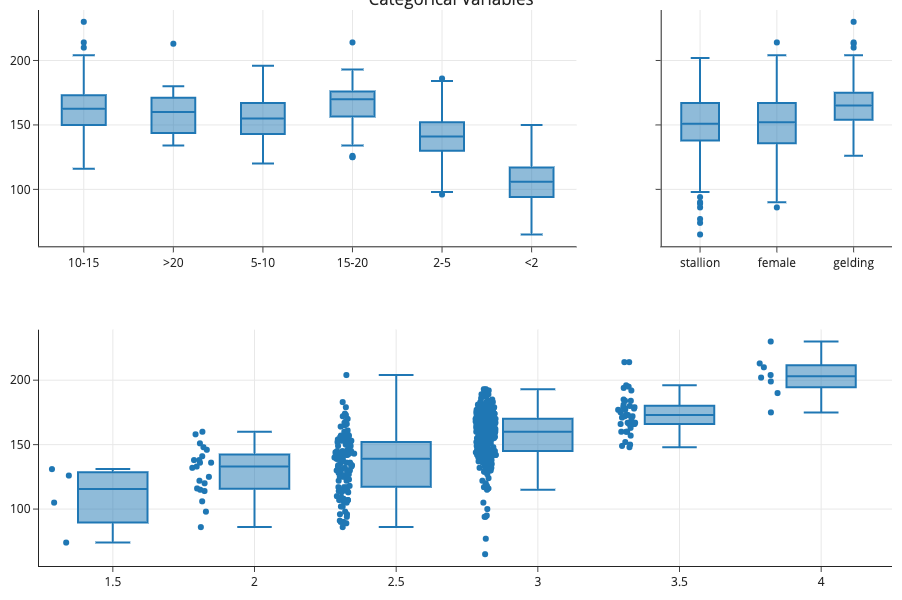

In [4]:
fig = make_subplots(rows=2, cols=2, shared_yaxes='all', column_widths=[0.7, 0.3],
                   specs=[[{}, {}],[{"colspan": 2}, None]],)

fig_1 = px.box(train_set, x = "Age", y="Weight", 
            category_orders = {"Age":['<2', '2-5', '5-10', '10-15', '15-20', '>20']})
fig_2 = px.box(train_set, x = "Sex", y="Weight")
fig_3 = px.box(train_set, x = "BCS", y="Weight", points="all")

fig.add_trace(fig_1.data[0], row=1, col=1)
fig.add_trace(fig_2.data[0], row=1, col=2)
fig.add_trace(fig_3.data[0], row=2, col=1)

fig.update_layout(height=600, width=600,
                  title_text="Categorical Variables")
fig

Notice that we plotted the points as well as the boxes for the body condition score because we saw earlier that there are only a handful of observations with a score of 1.5, so we don't want to read too much into a boxplot of a few data points ({numref}`Chapter %s <ch:viz>`). It appears that the median weight increases with the body condition score, but not in a simple linear fashion. On the other hand, weight distributions for the three sex categories appear roughly the same. As for age, once a donkey reaches five years, the distribution of weight seems to not change much with age. But, those donkeys under 2 and 2 to 5 years old have lower weights, in general.

Next, let's examine the quantitative variables. We plot all pairs of quantitative variables in the scatter plot matrix below.  

In [5]:
train_num = train_set[['Weight', 'Length', 'Girth', 'Height']]

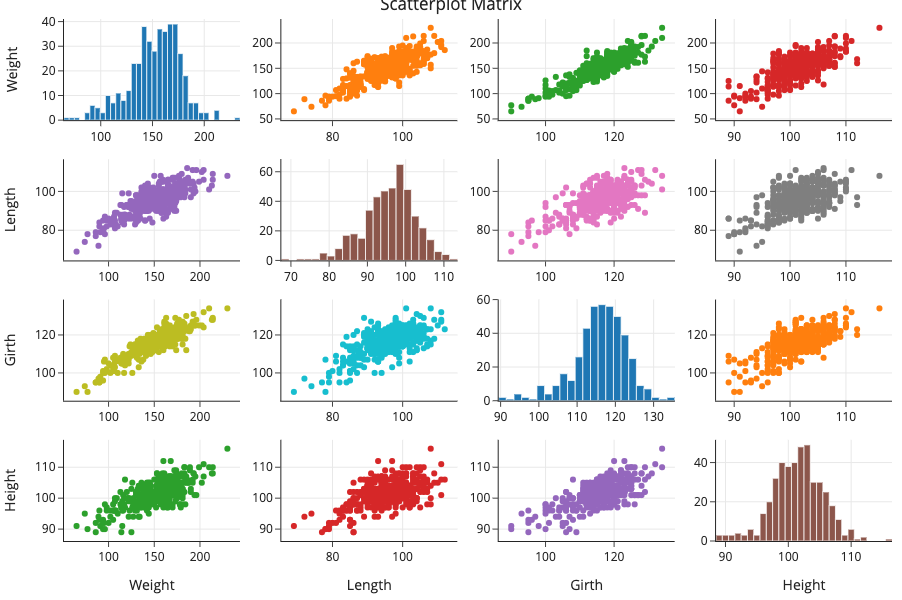

In [6]:
import plotly.figure_factory as ff

fig = ff.create_scatterplotmatrix(train_num,
                                  diag='histogram', 
                                  height=600, width=600)
fig

The height, length, and girth of donkeys all appear linearly associated with weight, and with each other. This is not too surprising; given one of the donkey's dimensions, we should have a good guess about the other dimensions. Girth appears most highly correlated with weight, and this is confirmed by the correlation coefficient matrix below.  

In [7]:
train_num.corr()

,Weight,Length,Girth,Height
Weight,1.00,0.78,0.90,0.71
Length,0.78,1.00,0.66,0.58
Girth,0.90,0.66,1.00,0.70
Height,0.71,0.58,0.70,1.00


Our explorations uncovered several aspects of the data. We found that the donkey's girth, length, and height all have linear associations with weight and with each other, and girth has the strongest linear relationship with weight. We also observed that the body condition score has a positive association with weight; the sex of the donkey does not appear related to weight; and neither does age for those donkeys over 5. We use these findings in our model building. 